# 1. Importing all the packages Required

In [3]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle
import pandas as pd
import os
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from gensim import corpora 
import warnings
warnings.filterwarnings("ignore")




# 2.Importing The Dataset

In [5]:
papers_data=pd.read_csv("E:/4TH_sem/ADA/LDA/papers.csv")
print("Shape of data",papers_data.shape)


Shape of data (7241, 7)


In [7]:
papers_data.head(10)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


In [9]:
print(papers_data.columns)

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')


# 3.Initial Pre-processing of Data

Perform removing puntuation and convert to lowercase

In [26]:
import pandas as pd
import re

# Remove columns
columns_to_drop = ['id', 'event_type', 'pdf_name']
existing_columns = [col for col in columns_to_drop if col in papers_data.columns]
if existing_columns:
    papers_data = papers_data.drop(columns=existing_columns)

# Remove punctuation
papers_data['paper_text_processed'] = papers_data['paper_text'].map(lambda x: re.sub(r'[,.!?]', '', x))

# Lowercasing
papers_data['paper_text_processed'] = papers_data['paper_text_processed'].map(lambda x: x.lower())

# Print the first few rows of the processed text
print(papers_data['paper_text_processed'].head())


648     a randomized algorithm for pairwise clustering...
3691    noise thresholds for spectral clustering\nsiva...
5194    estimating mixture models via mixtures of\npol...
1429    258\n\nseibert and waxman\n\nlearning aspect g...
1652    limiting form of the sample covariance\neigens...
Name: paper_text_processed, dtype: object


# Word Cloud

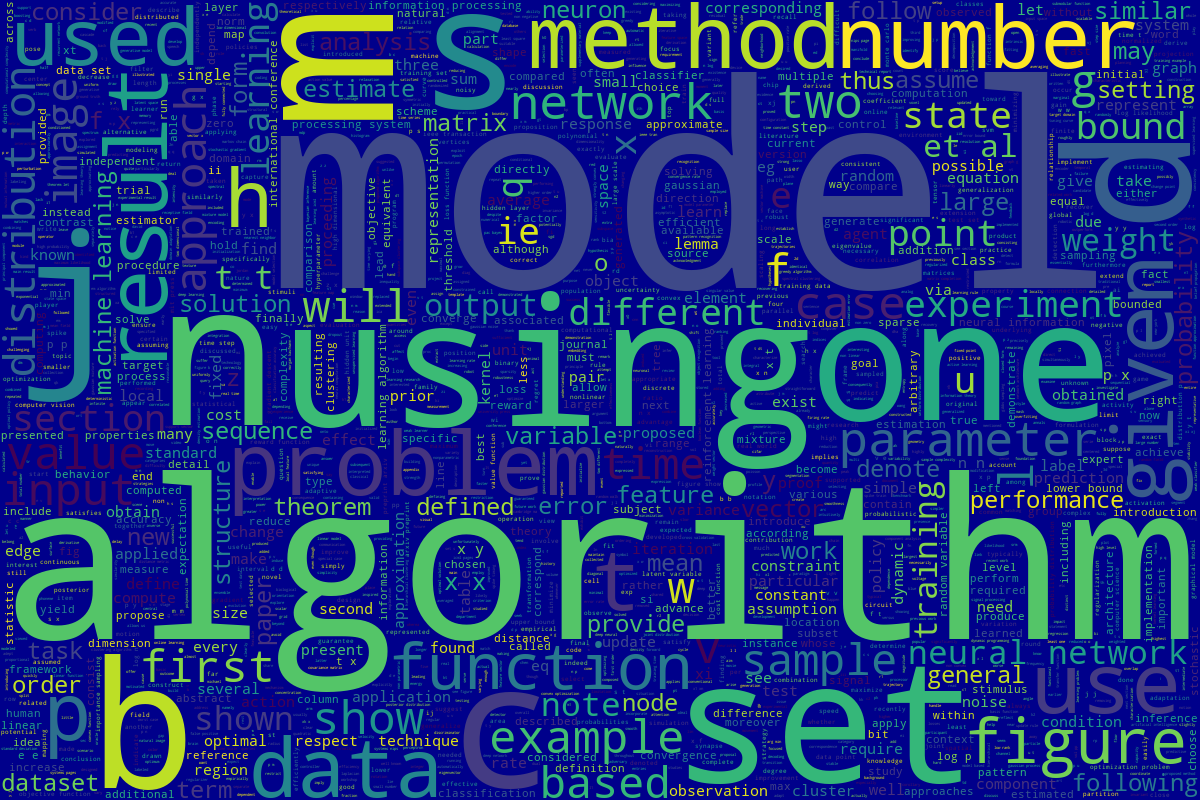

In [31]:
string=','.join(list(papers_data['paper_text_processed'].values))

wordcloud=WordCloud(background_color='darkblue',max_words=8000,contour_width=4,contour_color='steelgreen',width=1200,height=800)

wordcloud.generate(string)
wordcloud.to_image()

# 5. Initiating the LDA Analysis

In [33]:
stop_words=stopwords.words('english')
stop_words.extend(['from','subject','re','edu','using','use','model','one','two','set'])

def sent_to_word(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return[[word for word in simple_preprocess(str(doc))
            if word not in stop_words]for doc in texts]
    
data=papers_data.paper_text_processed.values.tolist()
data_words=list(sent_to_word(data))

data_words=remove_stopwords(data_words)
print(data_words[:1][0][:30])
            

['randomized', 'algorithm', 'pairwise', 'clustering', 'yoram', 'gdalyahu', 'daphna', 'weinshall', 'michael', 'werman', 'institute', 'computer', 'science', 'hebrew', 'university', 'jerusalem', 'israel', 'cshujiacil', 'abstract', 'present', 'stochastic', 'clustering', 'algorithm', 'based', 'pairwise', 'similarity', 'datapoints', 'method', 'extends', 'existing']


In [34]:
#create dictionary
id2word=corpora.Dictionary(data_words)
texts=data_words
corpus=[id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 5), (14, 43), (15, 1), (16, 6), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 4), (28, 1), (29, 1)]


In [36]:
#showing the code
id2word

# 6.LDA MODEL TRAINING

In [37]:
from pprint import pprint

num_topics=10
lda_model=gensim.models.LdaMulticore(corpus=corpus, id2word=id2word,num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda=lda_model[corpus]

[(0,
  '0.006*"data" + 0.005*"learning" + 0.004*"algorithm" + 0.004*"figure" + '
  '0.003*"time" + 0.003*"function" + 0.003*"number" + 0.003*"models" + '
  '0.003*"distribution" + 0.003*"training"'),
 (1,
  '0.006*"data" + 0.005*"learning" + 0.005*"algorithm" + 0.004*"time" + '
  '0.004*"number" + 0.003*"function" + 0.003*"figure" + 0.003*"log" + '
  '0.003*"network" + 0.003*"also"'),
 (2,
  '0.011*"learning" + 0.005*"data" + 0.005*"function" + 0.004*"algorithm" + '
  '0.004*"problem" + 0.004*"training" + 0.003*"matrix" + 0.003*"also" + '
  '0.003*"figure" + 0.003*"neural"'),
 (3,
  '0.007*"learning" + 0.005*"algorithm" + 0.005*"data" + 0.003*"time" + '
  '0.003*"first" + 0.003*"function" + 0.003*"problem" + 0.003*"figure" + '
  '0.003*"number" + 0.003*"used"'),
 (4,
  '0.007*"learning" + 0.005*"algorithm" + 0.005*"function" + 0.004*"data" + '
  '0.004*"number" + 0.004*"neural" + 0.004*"problem" + 0.003*"time" + '
  '0.003*"network" + 0.003*"networks"'),
 (5,
  '0.007*"learning" + 0.00

# 7. Analysing LDA MODEL

In [41]:
import os
import pickle
import pyLDAvis
import pyLDAvis.gensim_models

# Define the path for saving the visualization data
output_dir = 'E:\\4TH_sem\\ADA\\LDA'  # Update this path to your directory
results_dir = os.path.join(output_dir, '02_Results')

# Create the directory if it does not exist
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

pyLDAvis_data_filepath = os.path.join(results_dir, 'ldavis_prepared_' + str(num_topics))

# Prepare LDA visualization
if True:  # Replace with your condition if needed
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(pyLDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Load and save the visualization as an HTML file
with open(pyLDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, os.path.join(output_dir, 'ldavis_prepared_' + str(num_topics) + '.html'))

# Display the prepared visualization (in Jupyter Notebook, for example)
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.005127 -0.002622       1        1  21.066591
2      0.005215 -0.000775       2        1  14.620142
6      0.000045  0.006007       3        1  12.322246
4      0.002815 -0.003860       4        1  11.422165
9     -0.001055 -0.001650       5        1   9.149849
5     -0.002310  0.002451       6        1   8.205275
3      0.001539 -0.000031       7        1   6.995359
0     -0.007624 -0.003779       8        1   5.474013
8     -0.000397  0.005922       9        1   5.404880
1     -0.003355 -0.001664      10        1   5.339480, topic_info=           Term         Freq        Total Category  logprob  loglift
135        data  3606.000000  3606.000000  Default  30.0000  30.0000
1104   learning  4934.000000  4934.000000  Default  29.0000  29.0000
241    function  3170.000000  3170.000000  Default  28.0000  28.0000
14    algorithm  3516.000000  351

In [42]:
# Extract and print top words for each topic
print("Top words for each topic:")
for topic_num in range(num_topics):
    print(f"Topic {topic_num}:")
    top_words = [word for word, _ in lda_model.show_topic(topic_num, topn=10)]
    print(top_words)
    print()

# Get the topic distribution for a specific document
document_id = 0  # Replace with the ID of the document you want to analyze
document_topics = lda_model.get_document_topics(corpus[document_id])
print(f"Document {document_id} Topic Distribution:")
for topic_num, prob in document_topics:
    print(f"Topic {topic_num}: {prob:.4f}")
print()

# Create and save a summary of topics and their top keywords
topics_keywords = {}
for topic_num in range(num_topics):
    topics_keywords[topic_num] = [word for word, _ in lda_model.show_topic(topic_num, topn=10)]

# Create a DataFrame with topic numbers and their top words
topics_summary = {
    'Topic': [],
    'Top Words': []
}
for topic_num, keywords in topics_keywords.items():
    topics_summary['Topic'].append(topic_num)
    topics_summary['Top Words'].append(', '.join(keywords))

df_topics_summary = pd.DataFrame(topics_summary)
df_topics_summary.to_csv(os.path.join(results_dir, 'topics_summary.csv'), index=False)

print("Topics summary saved to 'topics_summary.csv'.")

Top words for each topic:
Topic 0:
['data', 'learning', 'algorithm', 'figure', 'time', 'function', 'number', 'models', 'distribution', 'training']

Topic 1:
['data', 'learning', 'algorithm', 'time', 'number', 'function', 'figure', 'log', 'network', 'also']

Topic 2:
['learning', 'data', 'function', 'algorithm', 'problem', 'training', 'matrix', 'also', 'figure', 'neural']

Topic 3:
['learning', 'algorithm', 'data', 'time', 'first', 'function', 'problem', 'figure', 'number', 'used']

Topic 4:
['learning', 'algorithm', 'function', 'data', 'number', 'neural', 'problem', 'time', 'network', 'networks']

Topic 5:
['learning', 'function', 'algorithm', 'time', 'data', 'distribution', 'log', 'problem', 'results', 'also']

Topic 6:
['data', 'algorithm', 'learning', 'function', 'number', 'time', 'results', 'bound', 'figure', 'also']

Topic 7:
['learning', 'algorithm', 'function', 'network', 'time', 'data', 'number', 'problem', 'figure', 'based']

Topic 8:
['function', 'learning', 'data', 'algorith